# Creating a quantum circuit

## Setting up the circuit

First off, we initialize by including our libraries.

In [ ]:
import qiskit as qk
import Qconfig
from qiskit import IBMQ
from pprint import pprint

Now, we create a quantum register of 2 qubits and a classical register of 2 cbits. And then we define a quantum circuit using these two registers.

In [ ]:
qr = qk.QuantumRegister(2)

cr = qk.ClassicalRegister(2)

qc = qk.QuantumCircuit(qr, cr)

Now, we apply Hadamard gate to 1st qubit and CNot gate on classical register. 

In [ ]:
pprint(qc.h(qr[0]))
pprint(qc.cx(qr[0], qr[1]))

We define a measure_Z circuit to do our measurements in standard basis.

In [ ]:
measure_Z = qk.QuantumCircuit(qr, cr)
measure_Z.measure(qr, cr)

Now, we define measure_X which does a measurement after applying Hadamard gate to 1st qubit.

In [ ]:
measure_X = qk.QuantumCircuit(qr, cr)
measure_X.h(qr[0])
measure_X.measure(qr, cr)

We now append the respective measurement circuits to the previous circuits.

In [ ]:
test_Z = qc + measure_Z
test_X = qc + measure_X

We can also draw pretty circuit diagrams from our coded circuits.

In [ ]:
test_Z.draw()
# test_X.draw()

┌───┐     ┌─┐   
q2_0: |0>┤ H ├──■──┤M├───
         └───┘┌─┴─┐└╥┘┌─┐
q2_1: |0>─────┤ X ├─╫─┤M├
              └───┘ ║ └╥┘
 c2_0: 0 ═══════════╩══╬═
                       ║ 
 c2_1: 0 ══════════════╩═

## Using IBMQ 

Setting up provider by my own API token.

In [ ]:
provider = IBMQ.enable_account(Qconfig.APItoken)
# provider = IBMQ.load_account()

IBMQAccountError: 'An IBM Q Experience account is already enabled.'

Print the list of IBMQ available backends.

In [ ]:
pprint(provider.backends())

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmqx2') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_16_melbourne') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_vigo') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_ourense') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_london') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_burlington') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_essex') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_armonk') from IBMQ(hub='ibm-q', group='open', project='main')>]


In [ ]:
backend = provider.get_backend('ibmqx2')

In [ ]:
job = qk.execute([test_Z, test_X], backend = backend, shots = 100)

In [ ]:
job.status()
result = job.result()

In [ ]:
result.get_counts(test_Z)
result.get_counts(test_X)

{'01': 21, '10': 18, '11': 31, '00': 30}

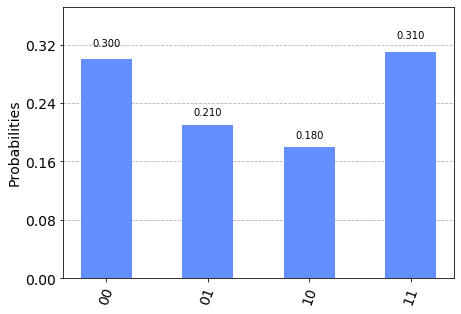

In [ ]:
from qiskit.tools.visualization import plot_histogram
plot_histogram(result.get_counts(test_X))

[<QasmSimulator('qasm_simulator') from AerProvider()>,
 <StatevectorSimulator('statevector_simulator') from AerProvider()>,
 <UnitarySimulator('unitary_simulator') from AerProvider()>,
 <PulseSimulator('pulse_simulator') from AerProvider()>]


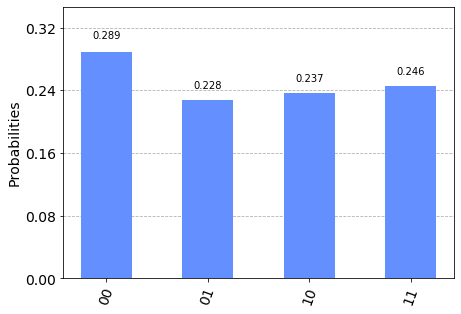

In [ ]:
from qiskit import Aer

# pprint(Aer.backends())
backend = Aer.get_backend('qasm_simulator')

job = qk.execute([test_Z, test_X], backend= backend, shots=1000)
result = job.result()

plot_histogram(result.get_counts(test_X))